In [1]:
#cluster these datasets where we
#cluster and find some characcteristics in this dataset

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("K_means.csv")
df.head()

,Name,Age,Income
0,Rbo,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


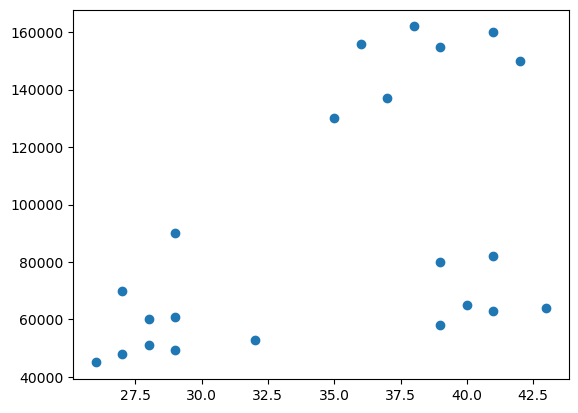

In [5]:
plt.scatter(df['Age'],df['Income'])
#we kindw see three clusters so k = 3 is suitable

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
#fit and predict
#it ran KMeans algorithm on age and income and made cluster as 
#we told algorithm to make 3 clusters n_cluster =3
#it did group them into three clusters 0,1,2
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [8]:
#somehow we can see which belong to which group
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rbo,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


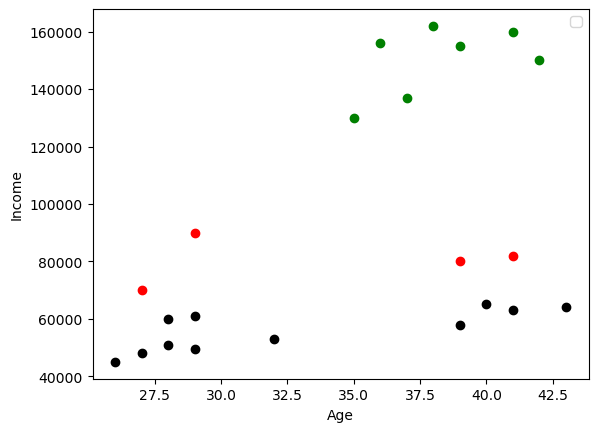

In [10]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.Age,df1['Income'],color = 'green')
plt.scatter(df2.Age,df2['Income'], color='red')
plt.scatter(df3.Age,df3['Income'], color='black')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

#some red and some black mixed 
#its because our scaling is not right


In [22]:
#we need to preprocess the data and scale it in similar way
#it will scale 0 to 1
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income,cluster
0,Rbo,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [23]:
#use KMeans algorithm to train our scaled dataset
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [26]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rbo,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [27]:
#these are centroids (x-axis and y-axis value)
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

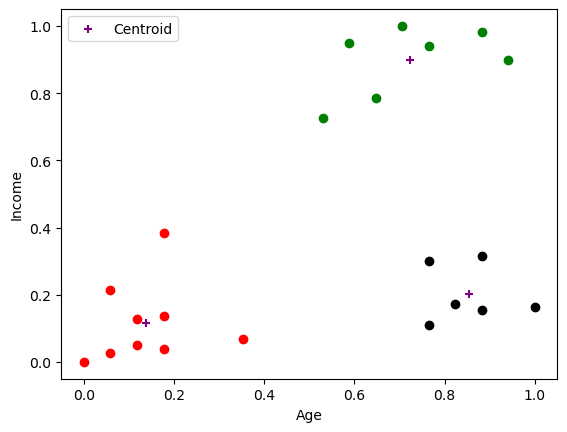

In [29]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.Age,df1['Income'],color = 'green',)
plt.scatter(df2.Age,df2['Income'], color='red')
plt.scatter(df3.Age,df3['Income'], color='black')

#plotting centroid on scatter plot
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='+', label='Centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [31]:
#determining elbo plot (kvalue)
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

In [32]:
sse


[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2621792762345213,
 0.2106667848801052,
 0.1827999446932993,
 0.1441795469181386,
 0.10383752586603559]

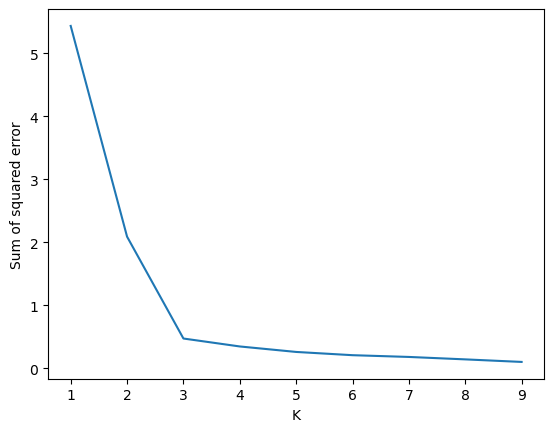

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
#since elobo looks like at point 3 so, for these dataset k will be k =3 suitable